In [1]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

In [2]:
# Add a 'light-curve(lc)' dataset to the bundle. 

b.add_dataset('lc', times = np.linspace(0,1,130), dataset = 'KOI_lc')
print(b.get_dataset(kind = 'lc', check_visible = False))

ParameterSet: 29 parameters
            times@KOI_lc@dataset: [0.         0.00775194 0.01550388 ... 0.98449612
 0.99224806 1.        ] d
           fluxes@KOI_lc@dataset: [] W / m2
         passband@KOI_lc@dataset: Johnson:V
  intens_weighting@KOI_lc@dat...: energy
*             ebv@KOI_lc@dataset: 0.0
               Av@KOI_lc@dataset: 0.0
               Rv@KOI_lc@dataset: 3.1
    compute_times@KOI_lc@dataset: [] d
*  compute_phases@KOI_lc@dataset: []
  compute_phases_t0@KOI_lc@da...: t0_supconj
           sigmas@KOI_lc@dataset: [] W / m2
       pblum_mode@KOI_lc@dataset: component-coupled
  pblum_component@KOI_lc@dataset: primary
    pblum_dataset@KOI_lc@dataset: 
           pbflux@KOI_lc@dataset: 1.0 W / m2
          l3_mode@KOI_lc@dataset: flux
               l3@KOI_lc@dataset: 0.0 W / m2
          l3_frac@KOI_lc@dataset: 0.0
          exptime@KOI_lc@dataset: 0.0 s
  ld_mode@primary@KOI_lc@dataset: interp
  ld_mode@secondary@KOI_lc@da...: interp
  ld_func@primary@KOI_lc@dataset: log

In [3]:
# Computation method given in paper = 'Wilson'

#b.run_compute(irrad_method = 'wilson')

<ParameterSet: 4 parameters | contexts: model, figure>

In [7]:
# Setting the value of the parameters in the parameter set. 

b.set_value('q', value=1.025)
b.set_value('period', component='binary', value=42*u.day)
b.set_value('sma', component='binary', value=0.395*u.AU)

# b.set_value('incl', component='binary', value=5.52)
b.set_value('incl', component='binary', value=90.) # Force eclipse # good value = 90

b.set_value('requiv', component='primary', value=2.19)
b.set_value('requiv', component='secondary', value=2.33)

b.set_value('ecc', component='binary', value=0.8342)
# b.set_value('ecc', component='binary', value=0.)

b.set_value('teff', component='primary', value=8498)
b.set_value('teff', component='secondary', value=8667)

# b.set_value('gravb_bol@primary', 0.9)
# b.set_value('gravb_bol@secondary', 0.9)

b.add_dataset('lc', times = np.linspace(0,2*42,100))

b.run_compute(irrad_method='none')
#b.run_compute(irrad_method = 'wilson')

Wed, 24 Mar 2021 19:28 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=8498K>8000K), for which gravb_bol>=0.9 might be a better approx than gravb_bol=0.32.
Wed, 24 Mar 2021 19:28 BUNDLE       WARNING 'secondary' probably has a radiative atm (teff=8667K>8000K), for which gravb_bol>=0.9 might be a better approx than gravb_bol=0.32.
Wed, 24 Mar 2021 19:28 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=8498K>=8000K), for which irrad_frac_refl_bol>0.8 (suggestion: 1.0) might be a better approx than irrad_frac_refl_bol=0.60.
Wed, 24 Mar 2021 19:28 BUNDLE       WARNING 'secondary' probably has a radiative atm (teff=8667K>=8000K), for which irrad_frac_refl_bol>0.8 (suggestion: 1.0) might be a better approx than irrad_frac_refl_bol=0.60.
Wed, 24 Mar 2021 19:28 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=8498K>8000K), for which gravb_bol>=0.9 might be a better approx than gravb_bol=0.32.
Wed, 24 Mar 2021 19:28 BUNDLE       WARNING 'secon

Wed, 24 Mar 2021 19:28 BUNDLE       WARNING 'secondary' probably has a radiative atm (teff=8667K>=8000K), for which irrad_frac_refl_bol>0.8 (suggestion: 1.0) might be a better approx than irrad_frac_refl_bol=0.60.


<ParameterSet: 8 parameters | contexts: model, figure>

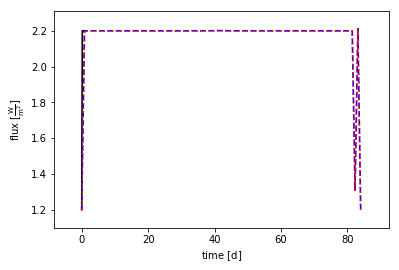

In [8]:
# Ploting flux vs time.

afig, mplfig = b['lc@model'].plot(show=True)

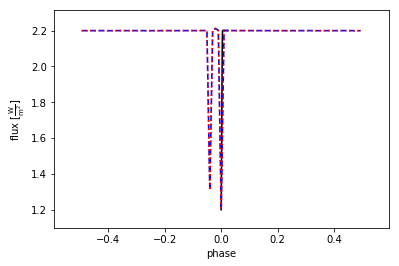

In [9]:
# Plotting flux in each phase.

afig, mplfig = b['lc@model'].plot(x='phases', show=True)